In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Задание уровень 0

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)

Надо:
- Изобразить вектора на экране
- Изобразить точку x + y + z
- Найти угол между векторами x и y

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [3]:
dot = x + y + z
dot

array([3, 3])

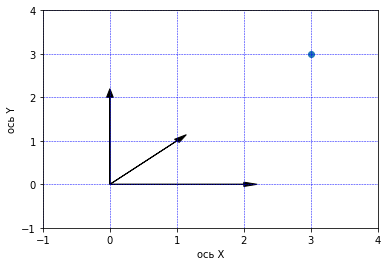

In [4]:
ax = plt.axes()


plt.xlim([-1,4])
plt.ylim([-1, 4])

plt.xlabel('ось Х')
plt.ylabel('ось Y')

ax.arrow( 0, 0, x[0], x[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, y[0], y[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )
ax.arrow( 0, 0, z[0], z[1], head_width=0.1, head_length=0.2, fc='k', ec='k' )

plt.scatter(dot[0], dot[1])
plt.grid(color = 'blue', linewidth = 0.5, linestyle = '--')

In [5]:
def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( a, b ) / ( aLength * bLength )

In [6]:
cosine( x, y )

0.7071067811865475

In [7]:
np.arccos( cosine( x, y ) ) * 360 / 2 / np.pi

45.00000000000001

## Задание уровень 1

Даны дома из Бостона

Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)

Написать код разложения дома по указанному базису

In [149]:
data = pd.read_csv('boston_data.csv')[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


- crim - per capita crime rate by town.

- zn - proportion of residential land zoned for lots over 25,000 sq.ft.

- indus - proportion of non-retail business acres per town.

- chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox - nitrogen oxides concentration (parts per 10 million).

- rm - average number of rooms per dwelling.

- age - proportion of owner-occupied units built prior to 1940.

- dis - weighted mean of distances to five Boston employment centres.

- rad - index of accessibility to radial highways.

- tax - full-value property-tax rate per 10,000.

- ptratio - pupil-teacher ratio by town.

- black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat - lower status of the population (percent).

**Как доказать, что векторы неколлинеарны? 
Для того чтобы два вектора пространства  были коллинеарны, необходимо и достаточно, чтобы их соответствующие координаты были пропорциональны. По идее, если есть решение СЛУ, то векторы не образут базис.
Так как неизвестных 13, то и строк я беру 13. В то время как строка 14 - это ответы для данной СЛУ.**

**Что меня смущает: этот способ предназначен для векторов плоскости, для трехмерного пространства же используется детерминант матрицы. Если он не равен 0, то векторы неколлинеарны. Но это задание в лекции по векторам, значит можно решить задачу, не прибегая к матрице.**

In [155]:
num_of_row = []
num_of_13 =[]
for i in range(13):
    for k in range(len(data.iloc[i])):
        num_of_row.append(data.iloc[i][k])
    num_of_13.append(num_of_row)
    num_of_row = []
print(num_of_13)

[[0.3494, 0.0, 9.9, 0.0, 0.544, 5.972, 76.7, 3.1025, 4.0, 304.0, 18.4, 396.24, 9.97], [2.7339700000000002, 0.0, 19.58, 0.0, 0.871, 5.597, 94.9, 1.5257, 5.0, 403.0, 14.7, 351.85, 21.45], [0.04337, 21.0, 5.64, 0.0, 0.439, 6.115, 63.0, 6.8147, 4.0, 243.0, 16.8, 393.97, 9.43], [0.0837, 45.0, 3.44, 0.0, 0.43700000000000006, 7.185, 38.9, 4.5667, 5.0, 398.0, 15.2, 396.9, 5.39], [0.19072999999999998, 22.0, 5.86, 0.0, 0.431, 6.718, 17.5, 7.8265, 7.0, 330.0, 19.1, 393.74, 6.56], [0.26938, 0.0, 9.9, 0.0, 0.544, 6.266, 82.8, 3.2628, 4.0, 304.0, 18.4, 393.39, 7.9], [10.0623, 0.0, 18.1, 0.0, 0.584, 6.832999999999999, 94.3, 2.0882, 24.0, 666.0, 20.2, 81.33, 19.69], [1.41385, 0.0, 19.58, 1.0, 0.871, 6.129, 96.0, 1.7494, 5.0, 403.0, 14.7, 321.02, 15.12], [25.9406, 0.0, 18.1, 0.0, 0.679, 5.303999999999999, 89.1, 1.6475, 24.0, 666.0, 20.2, 127.36, 26.64], [0.09252, 30.0, 4.93, 0.0, 0.428, 6.606, 42.2, 6.1899, 6.0, 300.0, 16.6, 383.78, 7.37], [1.00245, 0.0, 8.14, 0.0, 0.5379999999999999, 6.673999999999999

In [156]:
a = np.array(num_of_13)
a

array([[3.49400e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.44000e-01,
        5.97200e+00, 7.67000e+01, 3.10250e+00, 4.00000e+00, 3.04000e+02,
        1.84000e+01, 3.96240e+02, 9.97000e+00],
       [2.73397e+00, 0.00000e+00, 1.95800e+01, 0.00000e+00, 8.71000e-01,
        5.59700e+00, 9.49000e+01, 1.52570e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.51850e+02, 2.14500e+01],
       [4.33700e-02, 2.10000e+01, 5.64000e+00, 0.00000e+00, 4.39000e-01,
        6.11500e+00, 6.30000e+01, 6.81470e+00, 4.00000e+00, 2.43000e+02,
        1.68000e+01, 3.93970e+02, 9.43000e+00],
       [8.37000e-02, 4.50000e+01, 3.44000e+00, 0.00000e+00, 4.37000e-01,
        7.18500e+00, 3.89000e+01, 4.56670e+00, 5.00000e+00, 3.98000e+02,
        1.52000e+01, 3.96900e+02, 5.39000e+00],
       [1.90730e-01, 2.20000e+01, 5.86000e+00, 0.00000e+00, 4.31000e-01,
        6.71800e+00, 1.75000e+01, 7.82650e+00, 7.00000e+00, 3.30000e+02,
        1.91000e+01, 3.93740e+02, 6.56000e+00],
       [2.69380e-01, 0.00000e+

In [157]:
b = np.array(data.iloc[13])
b

array([1.1027e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01,
       6.4560e+00, 6.7800e+01, 7.2255e+00, 8.0000e+00, 2.8400e+02,
       1.9700e+01, 3.9690e+02, 6.7300e+00])

In [158]:
from numpy import linalg

In [159]:
linalg.solve(a, b)

array([   62.30738097,   122.80609819,   472.83204989,  -457.119408  ,
       -4818.54838885,    11.37743575,   -10.23357324,  -359.11106996,
        -133.58943947,   -14.44564646,   490.45191675,    -9.75753442,
         -48.39030372])

**Ответ есть, значит это не базис. Я перепробовала множество вариантов строк, ответ находится каждый раз.**